# NN with torch
1. No of columns = No of variable (features)
2. No of rows = No of samples
3. Tensor in shape (Row X Col)
4. samples, features = Tensor.shape()

## NN 3 Step !!!! (99% model use this same arch):
`Predict --> Loss --> Sandwich ( opt.zero | Loss.backward | opt.step )`

# From Scrach with Tensor without torch.nn

## IMP Maths & conventions
Consider Linear Regression & data with 2 features having model fitted on curve: y =  w1x1 + w2x2 + b [see diagram](https://docs.google.com/document/d/1W1Nsb6Zn2OBSXi85jTGZmPAh1Z0WMfNIZoodPI9VJ44/edit?tab=t.0#heading=h.c5j6qz87po0w)
1. data is represented in 2D tensor (2D array) with each feature in each col & each row represent 1 data point in 2D plane so above e.g 2 col with k-no of rows for k points on 2D plane
2. lower case x to represent 1 data point & X represent 2D matrix where no of rows = no of samples & no of col = no of features
3. in pytorch instead of finding y_predict one by one in loop using one data point for each x with weights (y_pred =  w1x1 + w2x2 + b) value and then storing in 2D table, rather we do all computation at once via matrix multiplication

   i.e `Y_PRED = X @ W + b`  here @ == matrix multiplication

   X = 2D matrix with all data sample i.e 1 data sample in 1 rows e.g with 3 data points (2D matrix)
   `X = [
            [2, 3],
            [7, 9],
            [8, 6]
        ]`

   & W = 2D matrix with data w1 & w2 in each row (W is of shape() [input_neuron X curr_neuron] [see diagram](https://docs.google.com/document/d/1W1Nsb6Zn2OBSXi85jTGZmPAh1Z0WMfNIZoodPI9VJ44/edit?tab=t.0#heading=h.c5j6qz87po0w))
   e.g `W = [
                [w1],
                [w2]
            ]`

   & Y_PRED is also 2D matrix where each row represents predicted value for each row of X.
   [see diagram](https://docs.google.com/document/d/1W1Nsb6Zn2OBSXi85jTGZmPAh1Z0WMfNIZoodPI9VJ44/edit?tab=t.0#heading=h.c5j6qz87po0w)
4. weight matrix W is represented by ϴ & grad(differentiation) by ▽ & learning rate by neeta η

In [350]:
import IPython
import torch
# representing curve y = 2x; where W = 2
X = torch.tensor([
                    [1],
                    [2],
                    [3]
                ])
# ↑ each row represent 1 data points

W = torch.tensor([
                    [2]
                ])
# ↑ No of row represents weight of each of the variables / features

Y = X @ W  # ↑ each row represent Y value of corresponding data points
print(Y)
'''
[
    [2],
    [4],
    [6]
]
'''

tensor([[2],
        [4],
        [6]])


'\n[\n    [2],\n    [4],\n    [6]\n]\n'


lets make a linear Y = WX+B model to predict linear data using only Tensor & gradient fn in Tensor
STEPS:
1. take data X & random initialize W & B & make a model y = WX + B
2. calculate mean square error loss L for each data
3. find gradient of L w.r.t W & B and update W & B
4. ↑ repeat step 1,2,3 for N no of times

In [356]:
# model for curve y = 3x + 7
X = torch.tensor([ [1.], [2.], [3.], [4.], [5.], [6.], [7.], [8.], [9.], [10.], [11.], [12.], [13.], [14.], [15.] ])
Y = torch.tensor([ [10.0], [13.0], [16.0], [19.0], [22.0], [25.0], [28.0], [31.0], [34.0], [37.0], [40.], [43.], [46.], [49.], [52.]])  # apx ~3x+7
W = torch.tensor([[0]], dtype=torch.float32, requires_grad=True)
B = torch.tensor([0], dtype=torch.float32, requires_grad=True)
print(W, B, X.dtype, Y.dtype)




tensor([[0.]], requires_grad=True) tensor([0.], requires_grad=True) torch.float32 torch.float32


# 3 STEP training
1. `predict` i.e Y_PRED / Y_HAT / model.predict(X) calculation
2. `LOSS_TENSOR.backward()` i.e build gradient graph
3. `W & B update` i.e calculate gradient & update W,B -= gradient

In [359]:
learning_rate = 0.001
Y_HAT = X@W + B
print(Y_HAT)

for i in range(100000):
    Y_HAT = X@W + B

    L = ((Y-Y_HAT)**2).mean()

    L.backward()


    with torch.no_grad():  #autograd engine will not track the operations to build the computational graph for gradient calculation
        W -= learning_rate * W.grad; B -= learning_rate * B.grad
    W.grad.zero_(); B.grad.zero_()


    if i % 10000 == 0:
        print("loss=" , L)
        print("W.grad || B.grad=",W.grad, " || ",B.grad)
        print("updated W, B= ",W, B)



loss= tensor(6.8765e-08, grad_fn=<MeanBackward0>)
W.grad || B.grad= tensor([[0.]])  ||  tensor([0.])
updated W, B=  tensor([[3.0001]], requires_grad=True) tensor([6.9994], requires_grad=True)
loss= tensor(6.8765e-08, grad_fn=<MeanBackward0>)
W.grad || B.grad= tensor([[0.]])  ||  tensor([0.])
updated W, B=  tensor([[3.0001]], requires_grad=True) tensor([6.9994], requires_grad=True)
loss= tensor(6.8765e-08, grad_fn=<MeanBackward0>)
W.grad || B.grad= tensor([[0.]])  ||  tensor([0.])
updated W, B=  tensor([[3.0001]], requires_grad=True) tensor([6.9994], requires_grad=True)
loss= tensor(6.8765e-08, grad_fn=<MeanBackward0>)
W.grad || B.grad= tensor([[0.]])  ||  tensor([0.])
updated W, B=  tensor([[3.0001]], requires_grad=True) tensor([6.9994], requires_grad=True)
loss= tensor(6.8765e-08, grad_fn=<MeanBackward0>)
W.grad || B.grad= tensor([[0.]])  ||  tensor([0.])
updated W, B=  tensor([[3.0001]], requires_grad=True) tensor([6.9994], requires_grad=True)
loss= tensor(6.8765e-08, grad_fn=<MeanBa

# same thing With torch.nn
### 3 STEP sandwich
Optimizer = (W, B) i.e model prams
1. Optimizer.zero_grad()
2. `LOSS_TENSOR.backward()`
3. Optimizer.step()

### Detailed:
1. `predict` i.e Y_PRED / Y_HAT / model.predict(X) calculation
2. `LOSS = MSE() / CROSS_ENT() / ...` i.e calculate loss
3. `sandwich` i.e calculate gradient & update W,B -= gradient
   1. Optimizer.zero_grad()
   2. `LOSS_TENSOR.backward()`
   3. Optimizer.step()

# MODEL
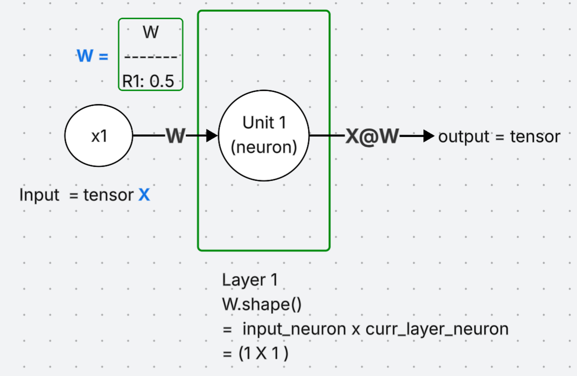
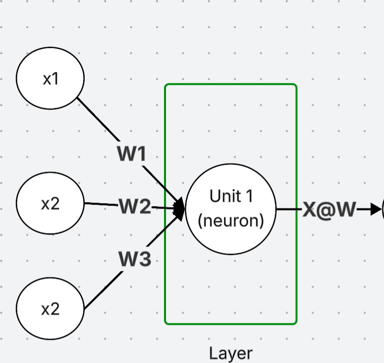

In [372]:
import torch.nn as nn

class ZeeLinearRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super(ZeeLinearRegression, self).__init__()
        self.layer1 = nn.Linear(in_features=in_features, out_features=out_features)

    def forward(self, X):
        return self.layer1(X)

model = ZeeLinearRegression(in_features=1, out_features=1)
print(model)



ZeeLinearRegression(
  (layer1): Linear(in_features=1, out_features=1, bias=True)
)


# DATA

In [373]:
X = torch.tensor([ [1.], [2.], [3.], [4.], [5.], [6.], [7.], [8.], [9.], [10.], [11.], [12.], [13.], [14.], [15.] ])
Y = torch.tensor([ [10.0], [13.0], [16.0], [19.0], [22.0], [25.0], [28.0], [31.0], [34.0], [37.0], [40.], [43.], [46.], [49.], [52.]])  # apx ~3x+7

# OPTIMIZER & LOSS

In [374]:
optim = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# 3 STEP Sandwich training
   1. Optimizer.zero_grad()
   2. `LOSS_TENSOR.backward()`
   3. Optimizer.step()

In [375]:
EPOCH = 10000
for epoch in range(EPOCH):
    loss = loss_fn(model(X), Y)

    # step 1: optimizer.zero_grad
    optim.zero_grad()

    # step 2: loss.backward()
    loss.backward()

    # step 3: optimizer.step()
    optim.step()

    # optional: print
    if epoch % 1000 == 0:
        print("epoch=", epoch, " loss=", loss.item(), " W =", model.parameters().__next__().item())

epoch= 0  loss= 739.4920654296875  W = 1.1055576801300049
epoch= 1000  loss= 3.0915093421936035  W = 3.3588836193084717
epoch= 2000  loss= 1.2631927728652954  W = 3.229405164718628
epoch= 3000  loss= 0.5161394476890564  W = 3.146639823913574
epoch= 4000  loss= 0.2108917087316513  W = 3.0937345027923584
epoch= 5000  loss= 0.08617105334997177  W = 3.0599167346954346
epoch= 6000  loss= 0.0352095365524292  W = 3.0383002758026123
epoch= 7000  loss= 0.014387011528015137  W = 3.0244827270507812
epoch= 8000  loss= 0.005878621246665716  W = 3.0156500339508057
epoch= 9000  loss= 0.002402166137471795  W = 3.0100038051605225


# verify

In [376]:
model(torch.tensor([[100.], [200.], [300.]]))

tensor([[307.5739],
        [608.2137],
        [908.8536]], grad_fn=<AddmmBackward0>)